<h1><center>K FOLD CROSS VALIDATION PYTHON TUTORIAL</center></h1>

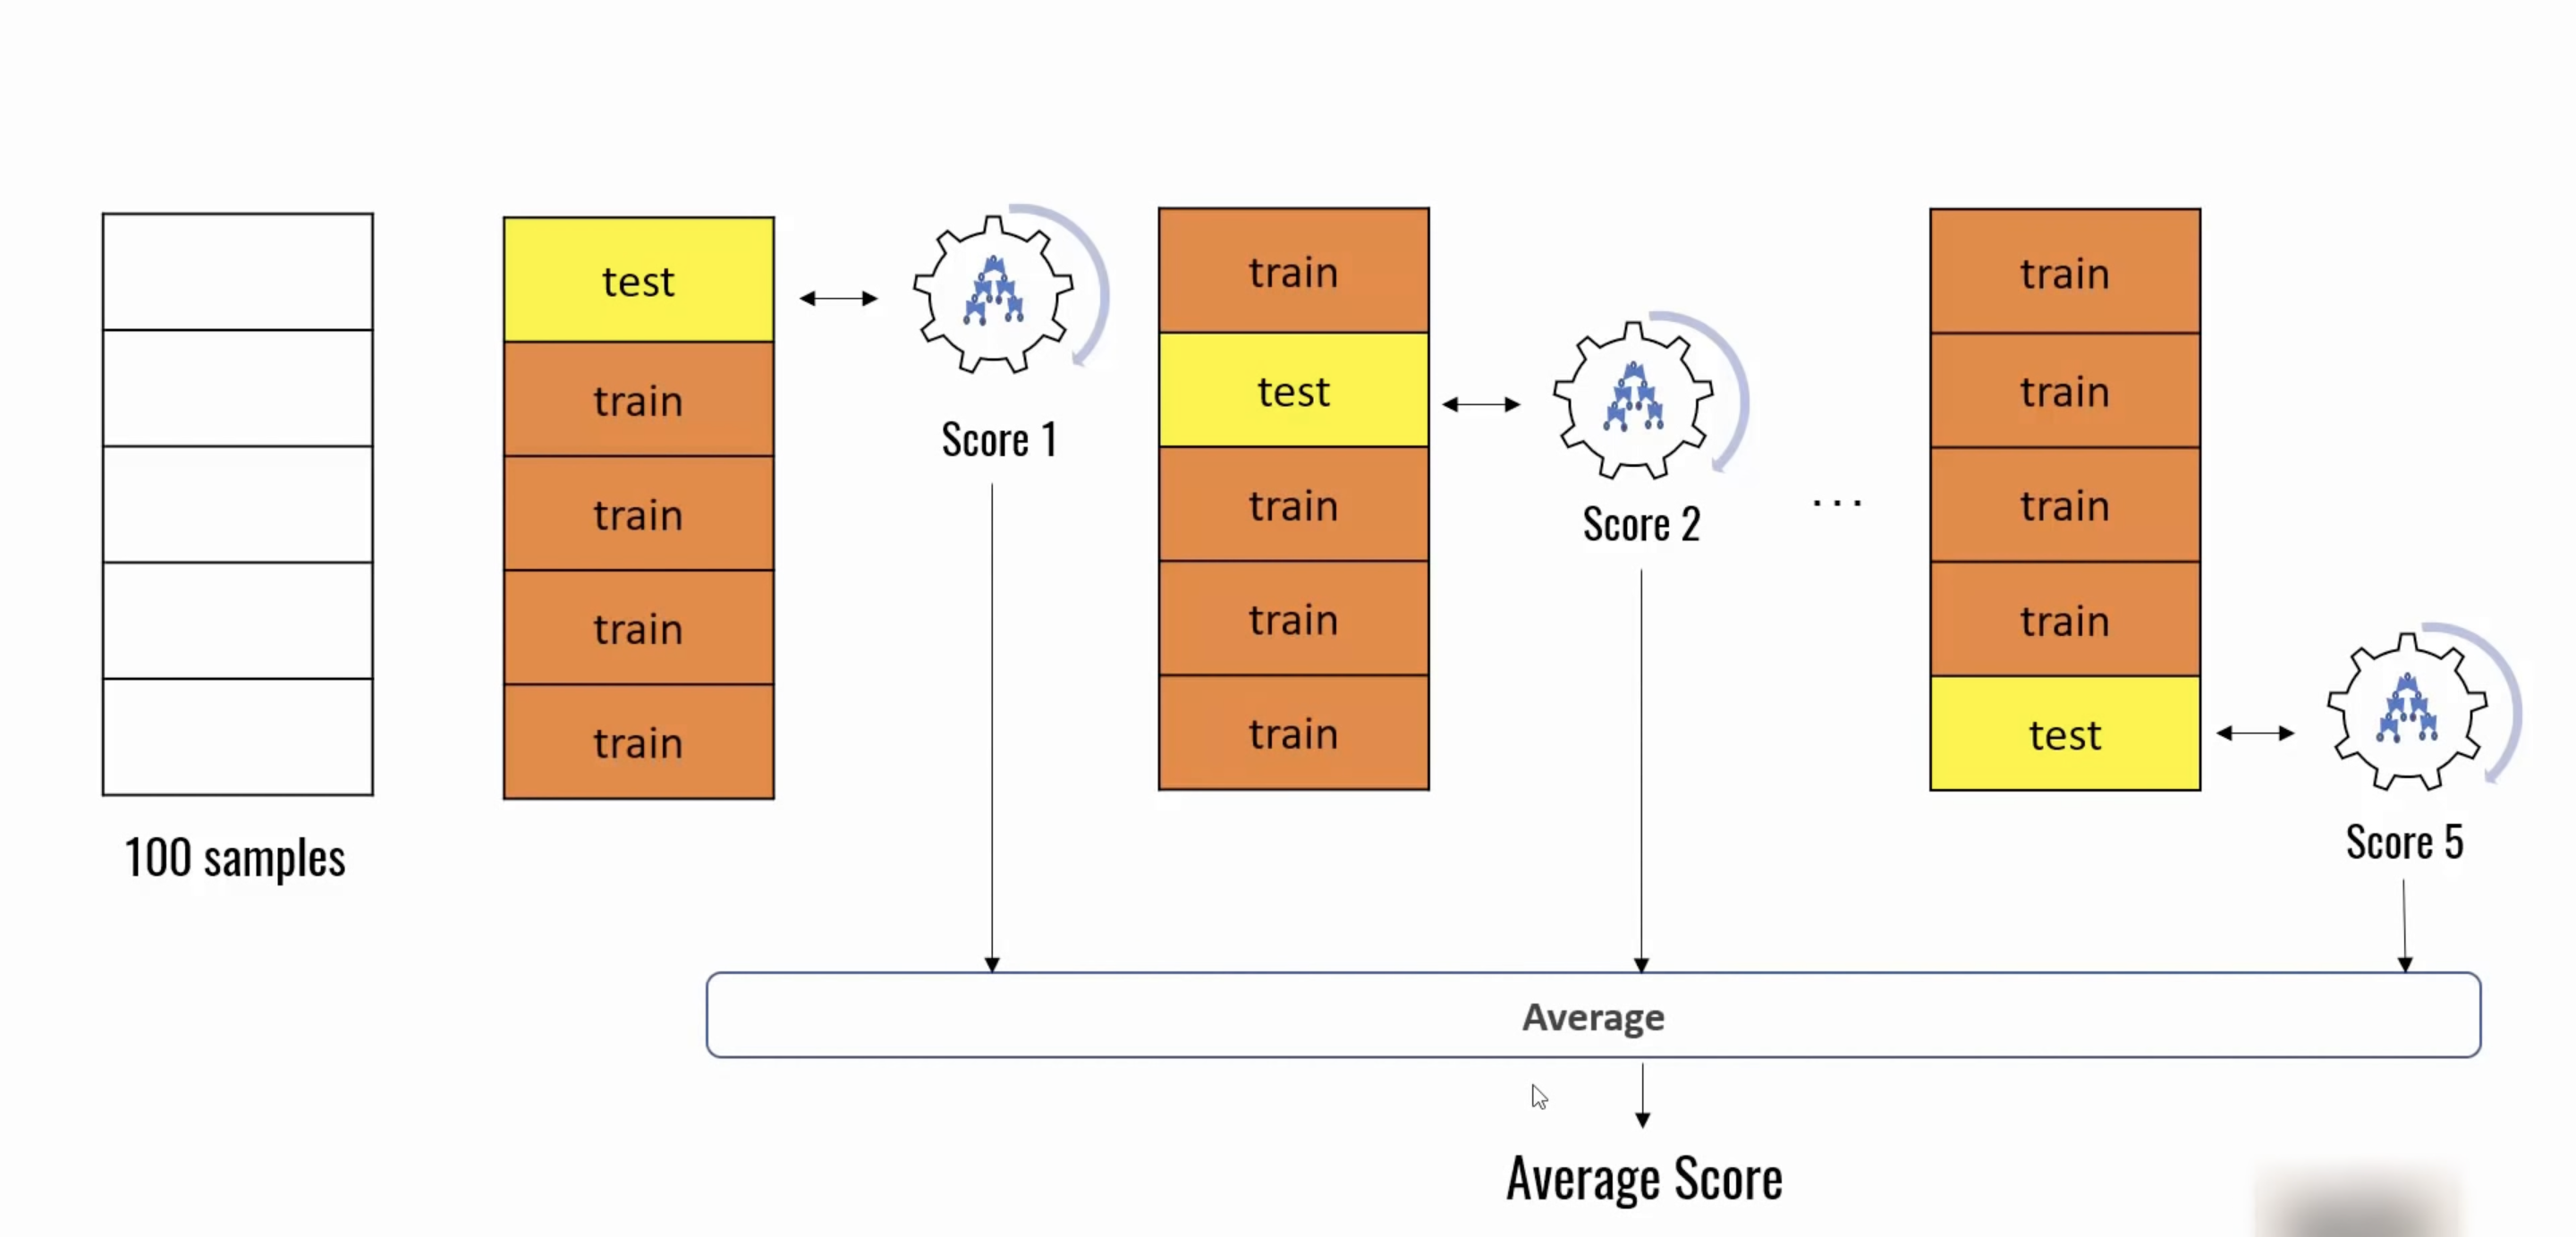

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier 
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits

digits = load_digits()

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target,test_size=0.3)

## Logistic Regression

In [3]:
lr = LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9722222222222222

## SVM

In [4]:
svm = SVC(gamma='auto')
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.2833333333333333

## Random Forest

In [5]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9796296296296296

# K FOLD CROSS VALIDATION

### Basic Example

In [6]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [7]:
for train_index, test_index in kf.split([1,2,3,4,5,6,7,8,9]):
    print(train_index,test_index)

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


### Use KFold For Our Digits Example

In [9]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_test, y_test)
    return model.score(X_test, y_test)

In [10]:
get_score(SVC(), X_train, X_test, y_train, y_test)

0.9925925925925926

In [12]:
get_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X_train, X_test, y_train, y_test)

1.0

In [14]:
get_score(RandomForestClassifier(), X_train, X_test, y_train, y_test)

1.0

In [16]:
from sklearn.model_selection import StratifiedKFold 
# StratifiedKFold is similar to k-fold but it is little better in a way that when you are separating out your force
# it will divide each of the classification categories in a uniform way
folds = StratifiedKFold(n_splits=3)
# Once your have folds ready so this method is exactly same as get_score :) !